# Quickstart
* [tutorial](http://lightkurve.keplerscience.org/tutorials/1.02-target-pixel-files.html)

To install the forked version of lightkurve with a simple patch:

In [1]:
import getpass
uname = getpass.getuser()

if uname == 'prometheus' or uname == 'jp':
    data_dir = '/home/'+uname+'/data/transit/c16-tpf/'
elif uname == 'muscat':
    data_dir = '../c16-tpf/'
else: 
    data_dir = '.'

In [2]:
import matplotlib.pyplot as pl
%matplotlib inline

import os
from glob import glob
import numpy as np
from astropy.io import fits
import pandas as pd

Test

In [3]:
file_list = glob(data_dir+'/Yu2018_candidates/*.fits')
file_list.sort()
len(file_list)

31

In [4]:
fname = file_list[-1]

rec_array = fits.open(fname)
rec_array.info()

Filename: /home/jp/data/transit/c16-tpf//Yu2018_candidates/ktwo251319382-unofficial-tpf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  TARGETTABLES    1 BinTableHDU    284   3888R x 12C   [D, E, J, 156J, 156E, 156E, 156E, 156E, 156E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (12, 13)   int32   


In [5]:
import sys
sys.path.append('../K2tools')
from utils import *

In [6]:
from lightkurve import KeplerTargetPixelFile

tpf = KeplerTargetPixelFile(fname, quality_bitmask='hardest')

In [7]:
np.sum(tpf.pipeline_mask)

0

In [8]:
times = tpf.time
fluxes = tpf.flux

aper_rad = 4
#masks
irregular_mask = make_mask(fluxes,cutoff_limit=1.0,shape='irregular')
round_mask  = make_mask(fluxes,rad=aper_rad,shape='round')
square_mask = make_mask(fluxes,rad=aper_rad,shape='square')

no_mask = make_mask(fluxes,shape='all')

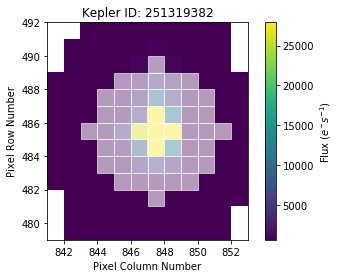

In [9]:
ax = tpf.plot(aperture_mask=round_mask, mask_color='w', frame=300,
              scale='linear', cmap='viridis', show_colorbar=True)

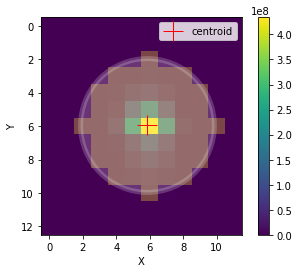

In [10]:
round_mask= make_mask(fluxes, rad=4, cutoff_limit=1.0, shape='round', showfig=True)

In [11]:
lc = tpf.to_lightcurve(aperture_mask='all');
lc = lc.remove_nans().remove_outliers(sigma=3)
flat_lc, trend = lc.flatten(window_length=301, return_trend=True)

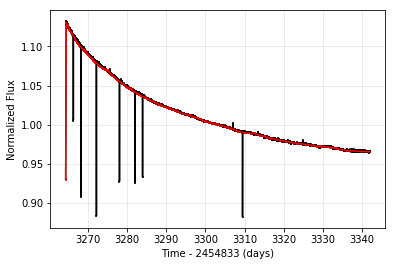

In [12]:
ax = lc.plot()                         
trend.plot(ax, color='red');

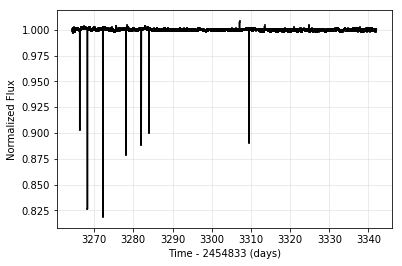

In [13]:
flat_lc.plot();

In [14]:
lc2 = tpf.to_lightcurve(aperture_mask=irregular_mask);
lc2 = lc2.remove_nans().remove_outliers(sigma=3.5)

In [15]:
lc2 = lc2.remove_nans().remove_outliers(sigma=3)
flat_lc2, trend = lc2.flatten(window_length=301, return_trend=True)

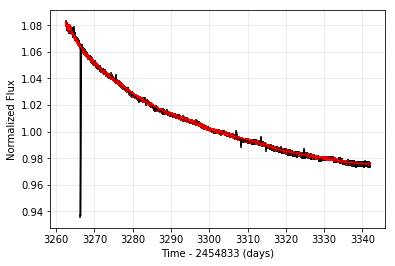

In [16]:
ax = lc2.plot()                         
trend.plot(ax, color='red');

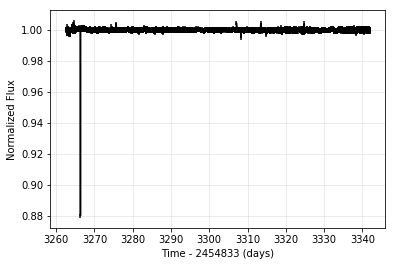

In [17]:
flat_lc2.plot();

In [18]:
corr_lc = lc2.correct(windows=51)

100%|██████████| 51/51 [00:02<00:00, 17.47it/s]


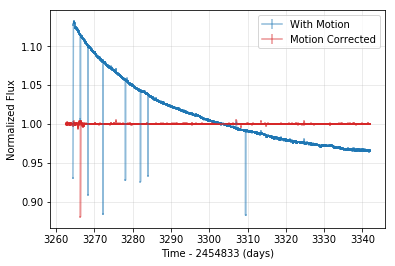

In [19]:
ax = lc.plot(color='C0', alpha=0.5, label='With Motion')
ax = corr_lc.plot(ax=ax, color='C3', alpha=0.5, label='Motion Corrected');

# Multiple apertures

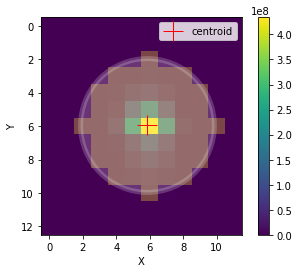

In [20]:
make_mask(fluxes, shape='round', rad=4, showfig=True);

In [21]:
radii = np.arange(3,6,1)

flux_per_r, aper_mask = aper_phot_multi(tpf,radii,aper_shape='round')

  0%|          | 0/30 [00:00<?, ?it/s]

Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 30/30 [00:02<00:00, 12.15it/s]


In [22]:
flux_per_r.keys()

dict_keys([3, 4, 5])

In [23]:
#time, flux, flux_err
flux_per_r[3]

(array([3262.46669148, 3263.30454375, 3262.48712679, ..., 3341.98107698,
        3342.00151196, 3342.02194683]),
 array([0.99975499, 1.0007922 , 0.99958984, ..., 0.9999028 , 0.99990222,
        0.99989405]),
 array([0.00158145, 0.00158132, 0.00158129, ..., 0.00162812, 0.00162786,
        0.00162762]))

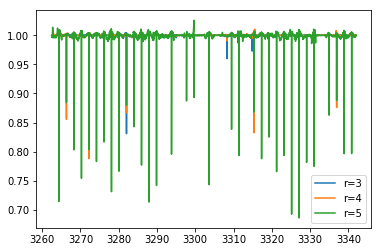

In [24]:
for i in flux_per_r:
    pl.plot(flux_per_r[i][0],flux_per_r[i][1],label='r={}'.format(i))
    pl.legend()

In [25]:
aper_phot_to_tpf(fname, radii, aper_shape='round')

  0%|          | 0/30 [00:00<?, ?it/s]

Aperture photometry with r=[3 4 5] and round mask...



100%|██████████| 30/30 [00:04<00:00,  6.44it/s]


OSError: File '251319382_test.fits' already exists.

In [ ]:
fname = file_list[0]

In [ ]:
aper_phot_to_tpf(fname, radii, aper_shape='irregular')

## Reading saved tpfs

In [26]:
new_tpfs = glob('*test.fits')

In [27]:
hdulist = fits.open(new_tpfs[0])
hdulist.info()

Filename: 251319382_test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  TARGETTABLES    1 BinTableHDU    284   3888R x 12C   [D, E, J, 156J, 156E, 156E, 156E, 156E, 156E, J, E, E]   
  2  APERTURE      1 ImageHDU        61   (12, 13)   float64   
  3  ROUND_APER0    1 BinTableHDU     68   3849R x 3C   [D, D, D]   
  4  ROUND_APER1    1 BinTableHDU     69   3853R x 3C   [D, D, D]   
  5  ROUND_APER2    1 BinTableHDU     70   3881R x 3C   [D, D, D]   


In [29]:
data, hdr = read_tpf(new_tpfs[0],index=2)

In [30]:
data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])